In [1]:
import tqdm
import torch
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

from generation.dataset.signals_dataset import SignalsDataset
from generation.training.wgan_trainer import WganTrainer
from generation.training.utils import set_seed

In [2]:
config = {
    "signal_size": 512,
    "inp_size": 16,
    "hidden_size": 16,
    "lr": 3e-4,
    "batch_size": 64,
    "device": 'cuda:2',
    "epochs_num": 100,
    "log_each": 1,
    "z_dim": 16
}

dataset = SignalsDataset(signal_size=config["signal_size"])
dataloader = DataLoader(dataset, batch_size=config['batch_size'], shuffle=True)

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

class Net(nn.Module):
    def __init__(self, config):
        super(Net, self).__init__()
        self.inp_size = config['inp_size']
        self.hidden_size = config['hidden_size']
        
        self.fc1 = nn.Linear(config["z_dim"], config["signal_size"] // 16)
        self.fc2 = nn.Linear(config["signal_size"] // 16, config["signal_size"] // 4)
        self.fc3 = nn.Linear(config["signal_size"] // 4, config["signal_size"])
#         self.fc = nn.Linear(1, self.inp_size)
#         self.lstm = nn.LSTM(self.inp_size, self.hidden_size, batch_first=True)
#         self.fc_final = nn.Linear(self.hidden_size, 1)
        
    def forward(self, z):
        out = F.tanh(self.fc1(z))
        out = F.tanh(self.fc2(out))
        out = F.sigmoid(self.fc3(out))
        return out
        
        
#         # Shape: (batch_size, seq_len, 1)
#         out = x.unsqueeze(-1)
#         # Shape: (batch_size, seq_len, inp_size)
#         out = self.fc(out)
#         # Shape: (batch_size, seq_len, hid_size)
#         out, _ = self.lstm(out)
#         # Shape: (batch_size, seq_len, 1)
#         out = self.fc_final(out)
#         # Shape: (batch_size, seq_len)
#         out = out.squeeze(2)
#         return out

In [4]:
model = Net(config).to(config['device'])
optimizer = torch.optim.Adam(model.parameters(), lr=config['lr'])
criterion = nn.L1Loss()

  0%|          | 0/155 [00:00<?, ?it/s]/home/pafakanov/data/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/home/pafakanov/data/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
100%|██████████| 155/155 [00:01<00:00, 148.03it/s]


Loss: 0.04185815155506134


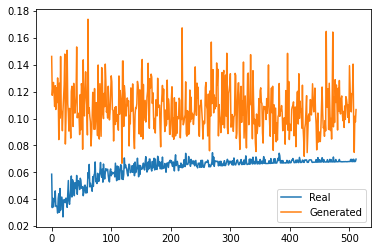

  0%|          | 0/155 [00:00<?, ?it/s]/home/pafakanov/data/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/home/pafakanov/data/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
100%|██████████| 155/155 [00:00<00:00, 188.32it/s]


Loss: 0.029997719451785088


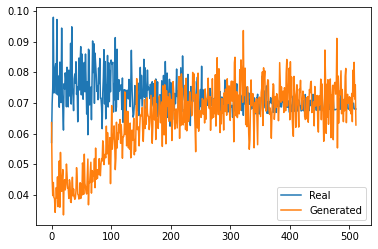

  0%|          | 0/155 [00:00<?, ?it/s]/home/pafakanov/data/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/home/pafakanov/data/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
100%|██████████| 155/155 [00:01<00:00, 151.83it/s]


Loss: 0.007758499123156071


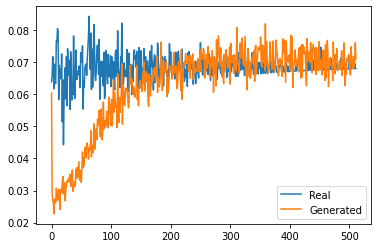

  0%|          | 0/155 [00:00<?, ?it/s]/home/pafakanov/data/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/home/pafakanov/data/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
100%|██████████| 155/155 [00:00<00:00, 164.64it/s]


Loss: 0.030921639874577522


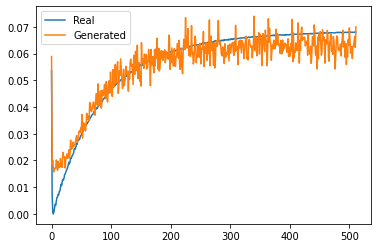

  0%|          | 0/155 [00:00<?, ?it/s]/home/pafakanov/data/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/home/pafakanov/data/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
100%|██████████| 155/155 [00:01<00:00, 146.01it/s]


Loss: 0.020128663629293442


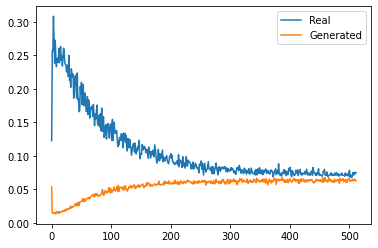

  0%|          | 0/155 [00:00<?, ?it/s]/home/pafakanov/data/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/home/pafakanov/data/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
100%|██████████| 155/155 [00:01<00:00, 153.83it/s]


Loss: 0.018085118383169174


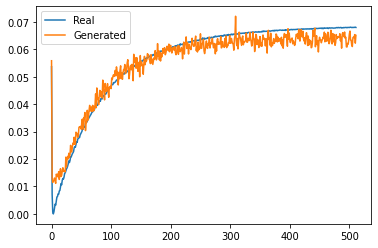

  0%|          | 0/155 [00:00<?, ?it/s]/home/pafakanov/data/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/home/pafakanov/data/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
100%|██████████| 155/155 [00:01<00:00, 147.59it/s]


Loss: 0.02106131613254547


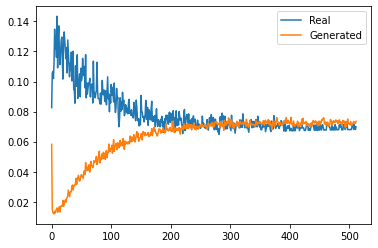

  0%|          | 0/155 [00:00<?, ?it/s]/home/pafakanov/data/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/home/pafakanov/data/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
100%|██████████| 155/155 [00:00<00:00, 198.92it/s]


Loss: 0.002733210101723671


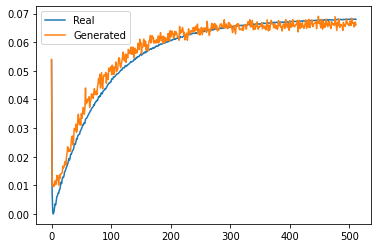

  0%|          | 0/155 [00:00<?, ?it/s]/home/pafakanov/data/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/home/pafakanov/data/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
100%|██████████| 155/155 [00:00<00:00, 168.32it/s]


Loss: 0.007331040687859058


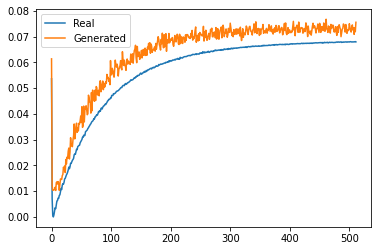

  0%|          | 0/155 [00:00<?, ?it/s]/home/pafakanov/data/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/home/pafakanov/data/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
100%|██████████| 155/155 [00:00<00:00, 161.01it/s]


Loss: 0.029796389862895012


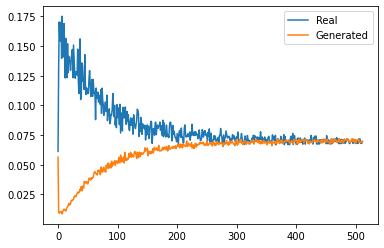

  0%|          | 0/155 [00:00<?, ?it/s]/home/pafakanov/data/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/home/pafakanov/data/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
100%|██████████| 155/155 [00:00<00:00, 165.76it/s]


Loss: 0.006254520267248154


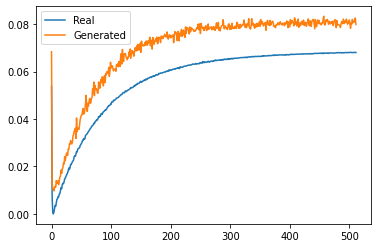

  0%|          | 0/155 [00:00<?, ?it/s]/home/pafakanov/data/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/home/pafakanov/data/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
100%|██████████| 155/155 [00:00<00:00, 179.22it/s]


Loss: 0.014091646298766136


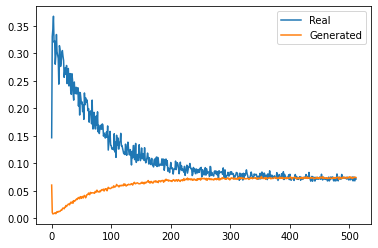

  0%|          | 0/155 [00:00<?, ?it/s]/home/pafakanov/data/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/home/pafakanov/data/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
100%|██████████| 155/155 [00:01<00:00, 148.13it/s]


Loss: 0.027930309996008873


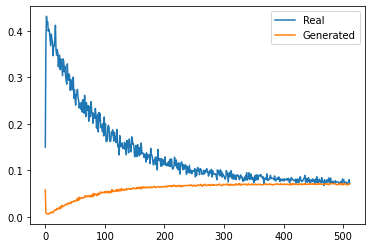

  0%|          | 0/155 [00:00<?, ?it/s]/home/pafakanov/data/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/home/pafakanov/data/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
100%|██████████| 155/155 [00:00<00:00, 169.76it/s]


Loss: 0.026876159012317657


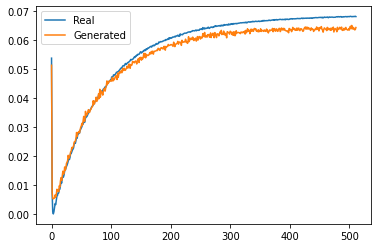

  0%|          | 0/155 [00:00<?, ?it/s]/home/pafakanov/data/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/home/pafakanov/data/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
100%|██████████| 155/155 [00:00<00:00, 182.48it/s]


Loss: 0.011111482977867126


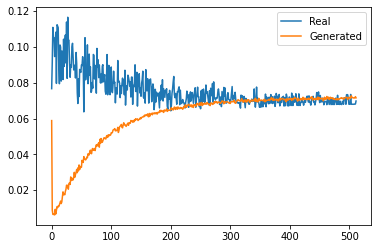

  0%|          | 0/155 [00:00<?, ?it/s]/home/pafakanov/data/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/home/pafakanov/data/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
100%|██████████| 155/155 [00:00<00:00, 208.27it/s]


Loss: 0.008086996152997017


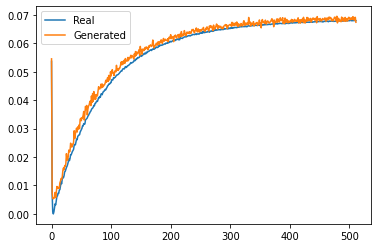

  0%|          | 0/155 [00:00<?, ?it/s]/home/pafakanov/data/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/home/pafakanov/data/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
100%|██████████| 155/155 [00:00<00:00, 171.71it/s]


Loss: 0.014875691384077072


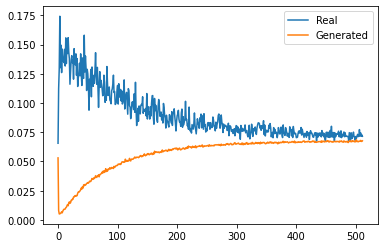

  0%|          | 0/155 [00:00<?, ?it/s]/home/pafakanov/data/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/home/pafakanov/data/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
100%|██████████| 155/155 [00:00<00:00, 197.23it/s]


Loss: 0.02778046950697899


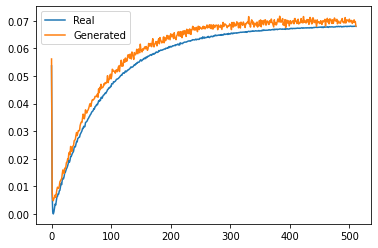

  0%|          | 0/155 [00:00<?, ?it/s]/home/pafakanov/data/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/home/pafakanov/data/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
100%|██████████| 155/155 [00:01<00:00, 118.11it/s]


Loss: 0.006396177224814892


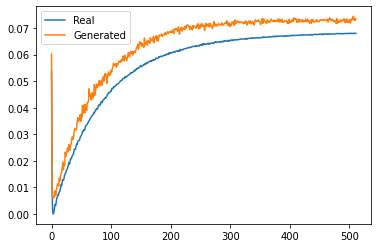

  0%|          | 0/155 [00:00<?, ?it/s]/home/pafakanov/data/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/home/pafakanov/data/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
100%|██████████| 155/155 [00:00<00:00, 159.75it/s]


Loss: 0.007530623115599155


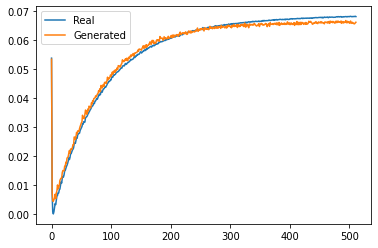

  0%|          | 0/155 [00:00<?, ?it/s]/home/pafakanov/data/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/home/pafakanov/data/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
100%|██████████| 155/155 [00:01<00:00, 142.20it/s]


Loss: 0.005279700271785259


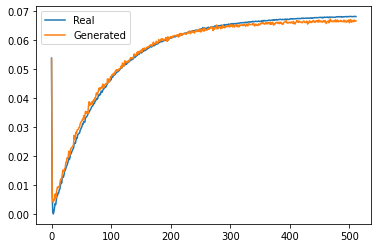

  0%|          | 0/155 [00:00<?, ?it/s]/home/pafakanov/data/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/home/pafakanov/data/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
100%|██████████| 155/155 [00:00<00:00, 171.62it/s]


Loss: 0.004800441674888134


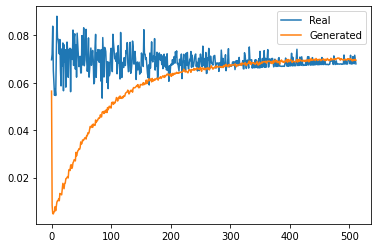

  0%|          | 0/155 [00:00<?, ?it/s]/home/pafakanov/data/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/home/pafakanov/data/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
100%|██████████| 155/155 [00:00<00:00, 180.20it/s]


Loss: 0.00805388018488884


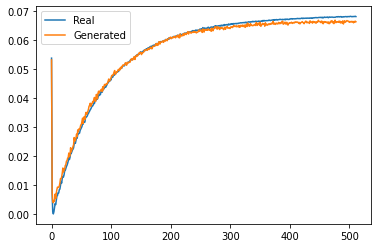

  0%|          | 0/155 [00:00<?, ?it/s]/home/pafakanov/data/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/home/pafakanov/data/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
100%|██████████| 155/155 [00:00<00:00, 164.17it/s]


Loss: 0.013481019996106625


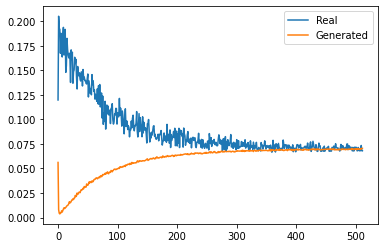

  0%|          | 0/155 [00:00<?, ?it/s]/home/pafakanov/data/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/home/pafakanov/data/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
100%|██████████| 155/155 [00:00<00:00, 190.70it/s]


Loss: 0.005830493755638599


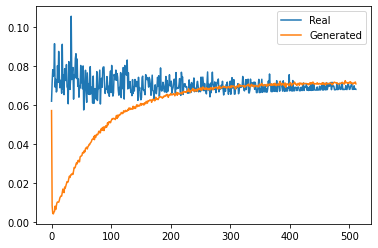

  0%|          | 0/155 [00:00<?, ?it/s]/home/pafakanov/data/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/home/pafakanov/data/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
100%|██████████| 155/155 [00:00<00:00, 169.53it/s]


Loss: 0.0032796459272503853


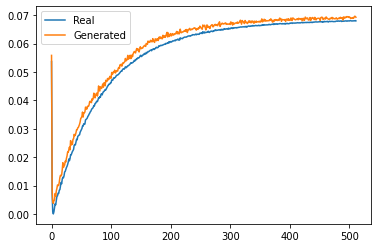

  0%|          | 0/155 [00:00<?, ?it/s]/home/pafakanov/data/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/home/pafakanov/data/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
100%|██████████| 155/155 [00:00<00:00, 176.36it/s]


Loss: 0.019028306007385254


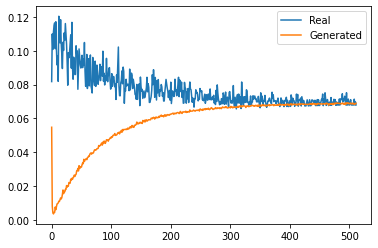

  0%|          | 0/155 [00:00<?, ?it/s]/home/pafakanov/data/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/home/pafakanov/data/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
100%|██████████| 155/155 [00:00<00:00, 197.64it/s]


Loss: 0.01275365985929966


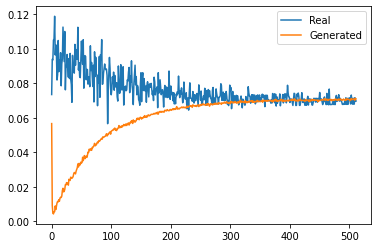

  0%|          | 0/155 [00:00<?, ?it/s]/home/pafakanov/data/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/home/pafakanov/data/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
100%|██████████| 155/155 [00:00<00:00, 174.08it/s]


Loss: 0.0042767999693751335


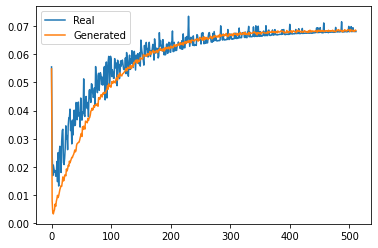

  0%|          | 0/155 [00:00<?, ?it/s]/home/pafakanov/data/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/home/pafakanov/data/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
100%|██████████| 155/155 [00:00<00:00, 186.16it/s]


Loss: 0.00977100059390068


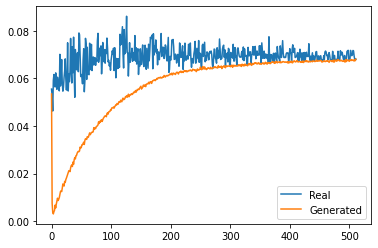

  0%|          | 0/155 [00:00<?, ?it/s]/home/pafakanov/data/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/home/pafakanov/data/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
100%|██████████| 155/155 [00:00<00:00, 167.77it/s]


Loss: 0.005448857322335243


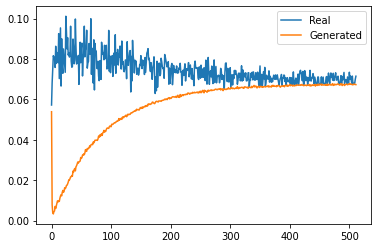

  0%|          | 0/155 [00:00<?, ?it/s]/home/pafakanov/data/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/home/pafakanov/data/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
100%|██████████| 155/155 [00:00<00:00, 187.03it/s]


Loss: 0.006757864262908697


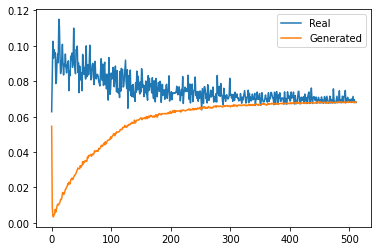

  0%|          | 0/155 [00:00<?, ?it/s]/home/pafakanov/data/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/home/pafakanov/data/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
100%|██████████| 155/155 [00:00<00:00, 194.39it/s]


Loss: 0.009933333843946457


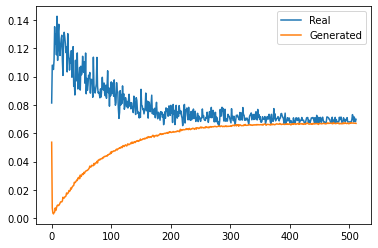

  0%|          | 0/155 [00:00<?, ?it/s]/home/pafakanov/data/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/home/pafakanov/data/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
100%|██████████| 155/155 [00:00<00:00, 194.37it/s]


Loss: 0.021222783252596855


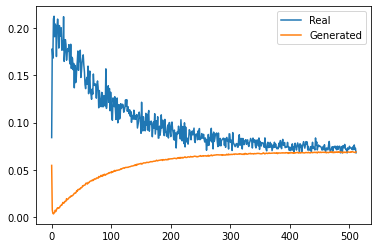

  0%|          | 0/155 [00:00<?, ?it/s]/home/pafakanov/data/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/home/pafakanov/data/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
100%|██████████| 155/155 [00:00<00:00, 157.74it/s]


Loss: 0.014687520451843739


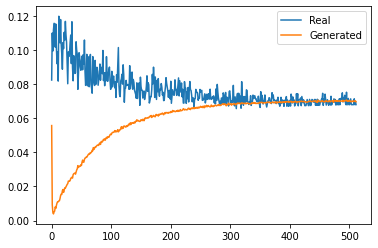

  0%|          | 0/155 [00:00<?, ?it/s]/home/pafakanov/data/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/home/pafakanov/data/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
100%|██████████| 155/155 [00:01<00:00, 151.14it/s]


Loss: 0.024750253185629845


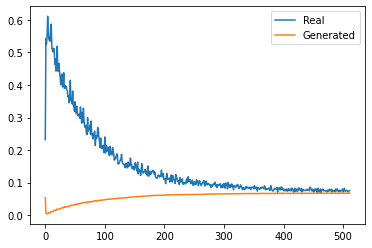

  0%|          | 0/155 [00:00<?, ?it/s]/home/pafakanov/data/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/home/pafakanov/data/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
100%|██████████| 155/155 [00:01<00:00, 138.90it/s]


Loss: 0.00402030348777771


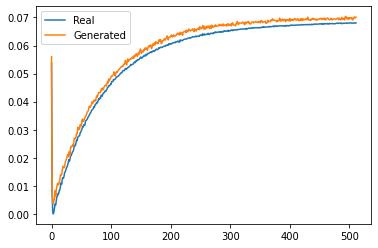

  0%|          | 0/155 [00:00<?, ?it/s]/home/pafakanov/data/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/home/pafakanov/data/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
100%|██████████| 155/155 [00:00<00:00, 189.62it/s]


Loss: 0.02318783663213253


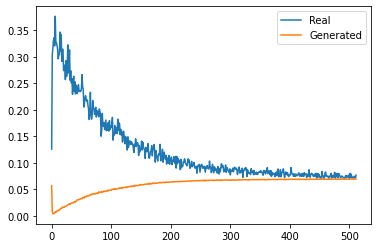

  0%|          | 0/155 [00:00<?, ?it/s]/home/pafakanov/data/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/home/pafakanov/data/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
100%|██████████| 155/155 [00:00<00:00, 176.78it/s]


Loss: 0.021518079563975334


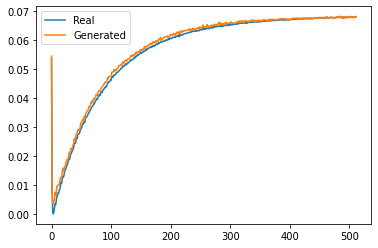

  0%|          | 0/155 [00:00<?, ?it/s]/home/pafakanov/data/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/home/pafakanov/data/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
100%|██████████| 155/155 [00:00<00:00, 207.41it/s]


Loss: 0.0080978162586689


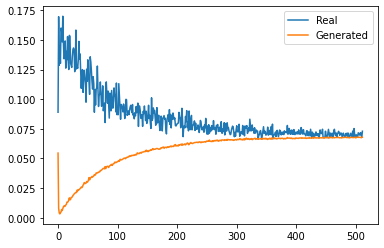

  0%|          | 0/155 [00:00<?, ?it/s]/home/pafakanov/data/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/home/pafakanov/data/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
100%|██████████| 155/155 [00:01<00:00, 134.27it/s]


Loss: 0.02683188021183014


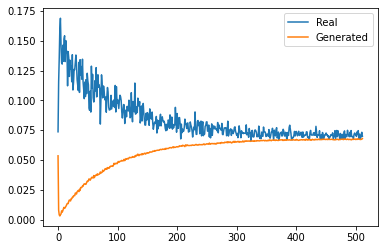

  0%|          | 0/155 [00:00<?, ?it/s]/home/pafakanov/data/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/home/pafakanov/data/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
100%|██████████| 155/155 [00:00<00:00, 170.43it/s]


Loss: 0.00523053715005517


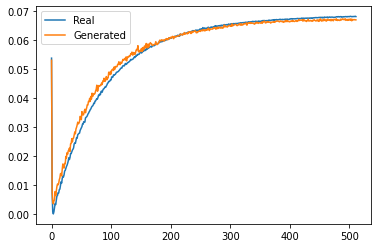

  0%|          | 0/155 [00:00<?, ?it/s]/home/pafakanov/data/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/home/pafakanov/data/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
100%|██████████| 155/155 [00:00<00:00, 155.63it/s]


Loss: 0.010371142998337746


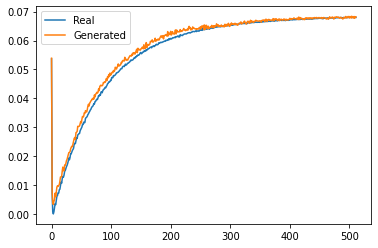

  0%|          | 0/155 [00:00<?, ?it/s]/home/pafakanov/data/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/home/pafakanov/data/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
100%|██████████| 155/155 [00:00<00:00, 194.30it/s]


Loss: 0.01063176803290844


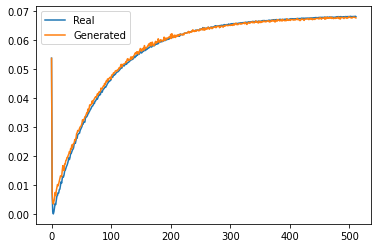

  0%|          | 0/155 [00:00<?, ?it/s]/home/pafakanov/data/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/home/pafakanov/data/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
 61%|██████▏   | 95/155 [00:00<00:00, 186.41it/s]

In [ ]:
for epoch in range(config['epochs_num']):
    for item in tqdm.tqdm(dataloader):
        noise = item[:, 0]
        noise = noise.to(config['device'])
        
        optimizer.zero_grad()

        z = Variable(torch.randn(len(noise), config['z_dim']))
        z = z.to(config['device'])
        preds = model(z)
        loss = criterion(noise, preds)
        loss.backward()
        optimizer.step()
    
    if epoch % config["log_each"] == 0:
        print(f"Loss: {loss.item()}")
        sample = preds[0].cpu().data
        real = noise[0].cpu().data
        plt.plot(real)
        plt.plot(sample)
        plt.legend(["Real", "Generated"])
        plt.show()

In [ ]:
net = Net(config)

In [ ]:
nn.Linear(1, 10)(test_tensor.unsqueeze(-1)).shape

In [ ]:
test_tensor = dataset[0][:1]
net(test_tensor).shape

In [ ]:
z = torch.randn((config["batch_size"], config["z_dim"]))
generator = Generator(config)
discriminator = Discriminator(config)
preds = discriminator(generator(z, debug=True), debug=True)
print(generator)
print(discriminator)